In [53]:
setwd("C:/Users/User/Downloads")

In [54]:
df <- read.csv("online_discounts.csv")
head(df)

,X,time,device,browser,region,discount,spend
,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>
1,0,10.7790063,mobile,edge,9,0,0.4551642
2,1,0.5689725,desktop,firefox,9,0,11.0368706
3,2,3.7438714,mobile,safari,7,0,1.8111930
4,3,13.3734357,desktop,other,5,0,31.9049439
5,4,0.7085752,mobile,explorer,2,1,15.4198624
6,5,10.8320878,desktop,brave,0,0,24.1239264


In [55]:
# Fit the linear model
model <- lm(spend ~ discount, data = df)

# Display the summary
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.122072,0.04543493,112.73424,0.000000e+00
discount,1.750692,0.06421938,27.26111,4.866824e-163


In [56]:
# Fit the linear model with interaction
model <- lm(spend ~ discount * device, data = df)

# Display the summary table of coefficients
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.07573921,0.06408531,79.202852,0.000000e+00
discount,1.08963150,0.09065748,12.019212,2.969281e-33
devicemobile,0.09293248,0.09076034,1.023933,3.058695e-01
discount:devicemobile,1.32109134,0.12828371,10.298200,7.387657e-25


In [57]:
# Load necessary packages
# install.packages("dplyr")
library(dplyr)

# Convert 'region' to a factor
df <- df %>%
  mutate(region = as.factor(region))

df <- df %>%
  mutate(browser = as.factor(browser))

df <- df %>%
  mutate(device = as.factor(device))

X <- c('time', 'device', 'browser', 'region')

Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`)."


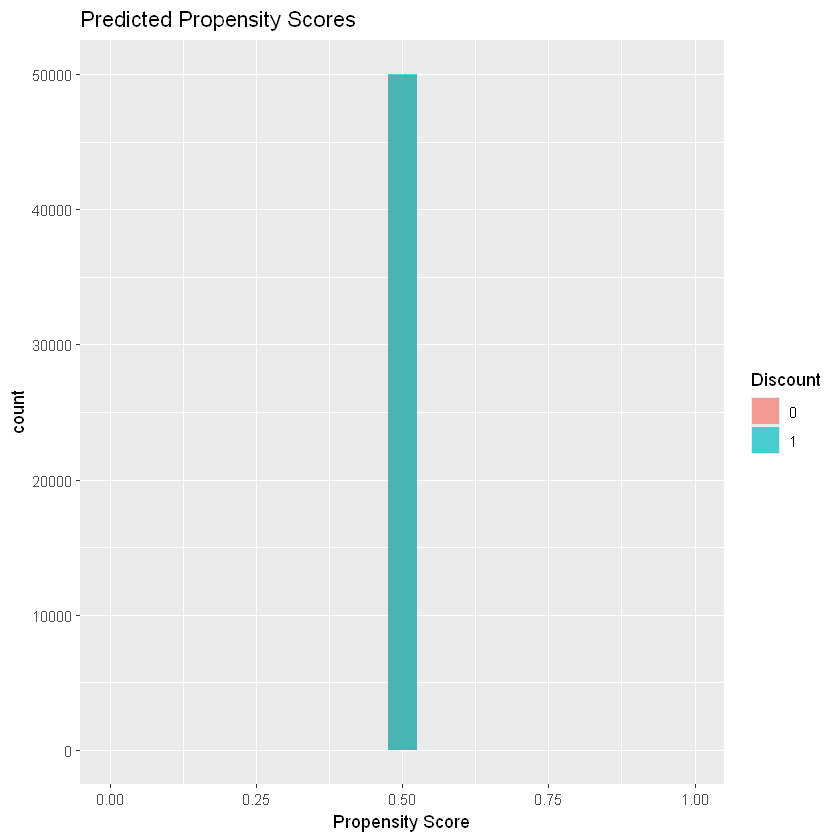

In [59]:
# Load necessary packages
# install.packages("ggplot2")
library(ggplot2)

# Fit the logistic regression model to predict propensity scores
logistic_model <- glm(discount ~ ., data = df[,c(X,'discount')], family = binomial)
df$pscore <- predict(logistic_model, df[X], type = "response")

# Plot the histogram with ggplot2
ggplot(df, aes(x = pscore, fill = as.factor(discount))) +
  geom_histogram(binwidth = 0.05, position = "identity", alpha = 0.7) +
  labs(
    title = "Predicted Propensity Scores",
    x = "Propensity Score",
    fill = "Discount"
  ) +
  xlim(0, 1)

In [61]:
df$y_star <- df$spend / (df$discount * df$pscore - (1 - df$discount) * (1 - df$pscore))

In [62]:
mean(df$y_star, na.rm = TRUE)

[1] 1.75716

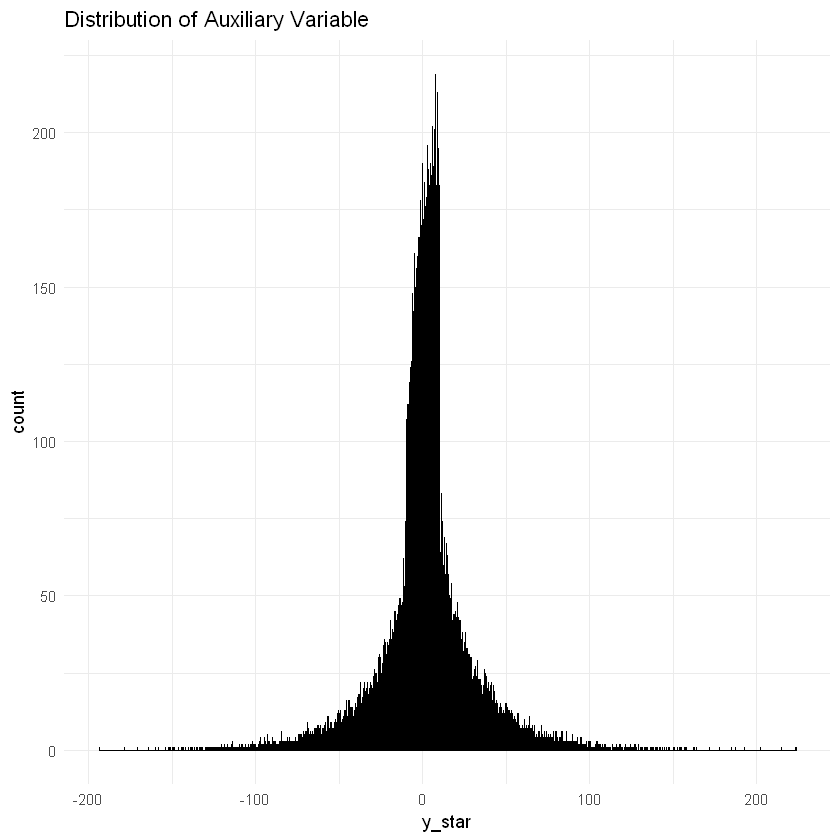

In [63]:
# Load ggplot2 package if not already loaded
# install.packages("ggplot2")
library(ggplot2)

# Create the histogram with ggplot2
ggplot(df, aes(x = y_star)) +
  geom_histogram(binwidth = 0.05, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Auxiliary Variable") +
  theme_minimal()

In [71]:
library(tree)

tree_model <- tree(y_star ~ .,
                   data = df[, c(X, "y_star")],
                   mincut = 1,
                   minsize = 2,
                   mindev = 1)

In [72]:
plot(tree_model)

ERROR: Error in plot.tree(tree_model): cannot plot singlenode tree


In [ ]:
install